In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

# Import data

Load CIFAR10 dataset with 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.


Labels: https://keras.io/api/datasets/cifar10/

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [7]:
print("x_train dimensions: ", x_train.shape)
print("y_train dimensions: ", y_train.shape)
print("x_test dimensions: ", x_test.shape)
print("y_test dimensions: ", y_test.shape)

x_train dimensions:  (50000, 32, 32, 3)
y_train dimensions:  (50000, 1)
x_test dimensions:  (10000, 32, 32, 3)
y_test dimensions:  (10000, 1)


Plot some images

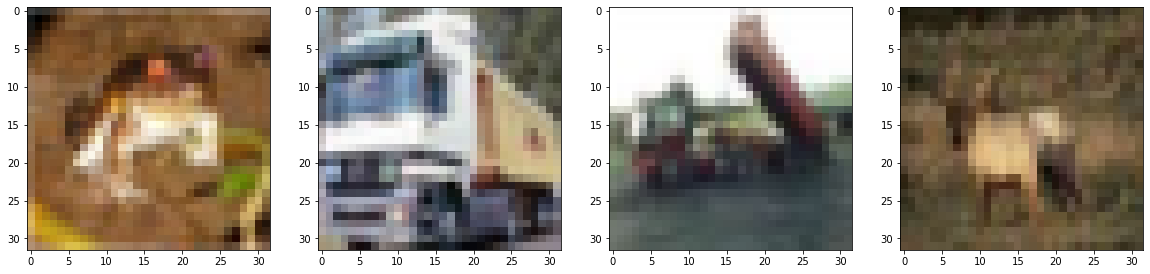

In [67]:
fig,axes = plt.subplots(nrows = 1, ncols = 4, figsize=(20,15))

for i in range(4):
    axes[i].imshow(x_train[i])
plt.show()

## Normalise data

Normalise X values from range [0, 255] to [0, 1]

In [81]:
x_train_norm = x_train / 255
x_test_norm = x_test / 255
x_train_norm[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# Build model

Function to plot loss and accuracy

In [143]:
def plot_perf(history):
    fig, axs = plt.subplots(2, figsize=(6, 6))

    axs[0].plot(history.history['loss'], color='blue', label='train')
    axs[0].plot(history.history['val_loss'], color='red', label='test')
    axs[0].set_title('Cross Entropy Loss')
    axs[0].set_ylabel('Loss') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend()
    axs[1].plot(history.history['accuracy'], color='blue', label='train')
    axs[1].plot(history.history['val_accuracy'], color='red', label='test')
    axs[1].set_title('Accuracy')
    axs[1].set_ylabel('Accuracy') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend()

    fig.tight_layout(pad=2.0)
    plt.figure(figsize=(8, 20))

## Initial Network: 3 x (CONV -> POOLING) layers

In [145]:
input_shape = (32, 32, 3)
num_classes = 10
filter_size = (3, 3)
pool_size = (2, 2)

# Build model
model = Sequential([
    Conv2D(32, filter_size, input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(num_classes, activation='softmax'),
])
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    x_train,
    to_categorical(y_train), # One-hot encode target label
    validation_data=(x_test, to_categorical(y_test)),
    batch_size=128,
    epochs=10,
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 256)             

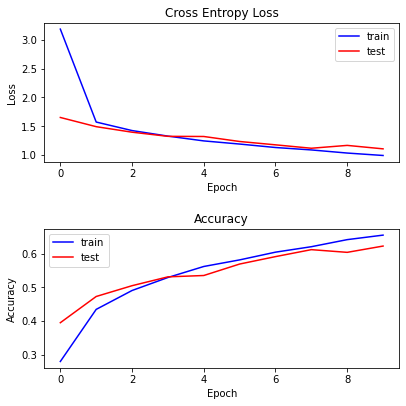

<Figure size 576x1440 with 0 Axes>

In [146]:
plot_perf(history)

## Increase filter in conv layer

In [147]:
input_shape = (32, 32, 3)
num_classes = 10
filter_size = (3, 3)
pool_size = (2, 2)

# Build model
model = Sequential([
    Conv2D(32, filter_size, input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(128, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(num_classes, activation='softmax'),
])
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    x_train,
    to_categorical(y_train), # One-hot encode target label
    validation_data=(x_test, to_categorical(y_test)),
    batch_size=128,
    epochs=10,
)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 512)             

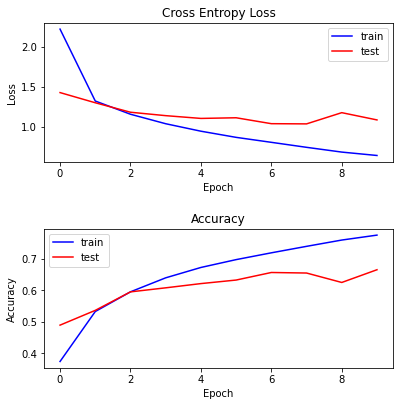

<Figure size 576x1440 with 0 Axes>

In [148]:
plot_perf(history)

## Add batch norm

In [149]:
input_shape = (32, 32, 3)
num_classes = 10
filter_size = (3, 3)
pool_size = (2, 2)

# Build model
model = Sequential([
    Conv2D(32, filter_size, input_shape=input_shape, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(num_classes, activation='softmax'),
])
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    x_train,
    to_categorical(y_train), # One-hot encode target label
    validation_data=(x_test, to_categorical(y_test)),
    batch_size=128,
    epochs=10,
)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 2, 2, 64)        

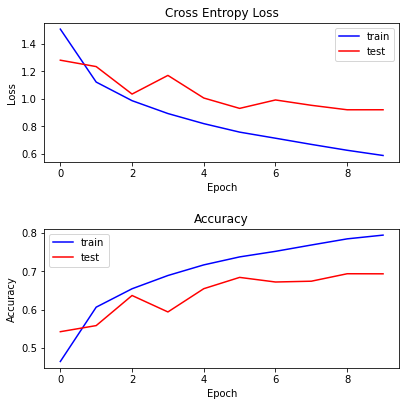

<Figure size 576x1440 with 0 Axes>

In [150]:
plot_perf(history)

## Add fully connected layer

In [152]:
input_shape = (32, 32, 3)
num_classes = 10
filter_size = (3, 3)
pool_size = (2, 2)

# Build model
model = Sequential([
    Conv2D(32, filter_size, input_shape=input_shape, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax'),
])
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    x_train,
    to_categorical(y_train), # One-hot encode target label
    validation_data=(x_test, to_categorical(y_test)),
    batch_size=128,
    epochs=10,
)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 2, 2, 64)        

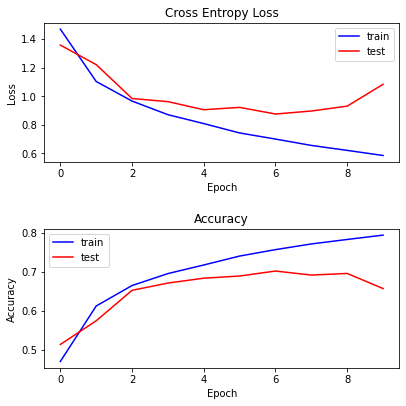

<Figure size 576x1440 with 0 Axes>

In [153]:
plot_perf(history)

## Add dropout to fully connected layer

In [161]:
input_shape = (32, 32, 3)
num_classes = 10
filter_size = (3, 3)
pool_size = (2, 2)

# Build model
model = Sequential([
    Conv2D(32, filter_size, input_shape=input_shape, activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(64, filter_size, activation='relu'),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
history = model.fit(
    x_train,
    to_categorical(y_train), # One-hot encode target label
    validation_data=(x_test, to_categorical(y_test)),
    batch_size=128,
    epochs=15,
)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 2, 2, 64)        

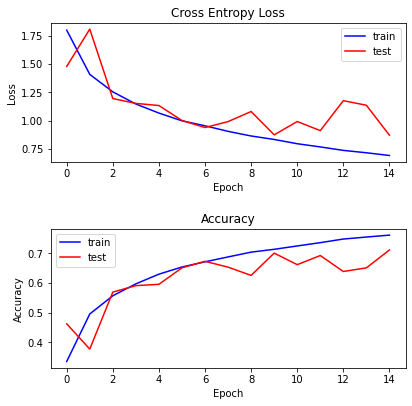

<Figure size 576x1440 with 0 Axes>

In [162]:
plot_perf(history)

# Conclusion
From a relatively simple network, we achieve a test set accuracy of 71.7% in just 15 epochs.